In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0120.jpeg
/kaggle/input/covid19-image-dataset/Co

In [2]:
IMAGE_SIZE = [224, 224] 

train_path = '../input/covid19-image-dataset/Covid19-dataset/train'
valid_path = '../input/covid19-image-dataset/Covid19-dataset/test'

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


   16384/58889256 [..............................] - ETA: 0s

2022-03-23 23:10:09.437097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:10:09.531499: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:10:09.532232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:10:09.533301: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
for layer in vgg.layers:
  layer.trainable=False

In [7]:
folders=glob( '../input/covid19-image-dataset/Covid19-dataset/train/*')

In [8]:
x=Flatten()(vgg.output)

prediction=Dense(len(folders),activation='softmax')(x)


model = Model(inputs=vgg.input, outputs=prediction)


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    rotation_range=20,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 66 images belonging to 3 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-23 23:17:18.694824: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-03-23 23:17:22.531956: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 [==============================] - 28s 2s/step - loss: 1.7948 - accuracy: 0.4622 - val_loss: 1.5270 - val_accuracy: 0.3485
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 1.0039 - accuracy: 0.5817 - val_loss: 1.4251 - val_accuracy: 0.6061
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.6691 - accuracy: 0.7371 - val_loss: 0.5649 - val_accuracy: 0.7727
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 0.4482 - accuracy: 0.8048 - val_loss: 0.3832 - val_accuracy: 0.8030
Epoch 5/15
8/8 [==============================] - 13s 2s/step - loss: 0.3644 - accuracy: 0.8446 - val_loss: 0.2671 - val_accuracy: 0.8636
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.2546 - accuracy: 0.8884 - val_loss: 0.2412 - val_accuracy: 0.8939
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.2297 - accuracy: 0.9203 - val_loss: 0.2259 - val_accuracy: 0.8788
Epoch 8/15
8/8 [=============================

In [15]:
r.history

{'loss': [1.7947545051574707,
  1.0039058923721313,
  0.66910320520401,
  0.4481978416442871,
  0.364410936832428,
  0.25457870960235596,
  0.22971650958061218,
  0.1898307353258133,
  0.1667436957359314,
  0.17484280467033386,
  0.13101200759410858,
  0.1299256831407547,
  0.12847357988357544,
  0.1862746775150299,
  0.13289257884025574],
 'accuracy': [0.4621514081954956,
  0.5816733241081238,
  0.737051784992218,
  0.804780900478363,
  0.8446215391159058,
  0.8884462118148804,
  0.9203187227249146,
  0.9243028163909912,
  0.9601593613624573,
  0.9442231059074402,
  0.9641434550285339,
  0.9442231059074402,
  0.9641434550285339,
  0.9442231059074402,
  0.9641434550285339],
 'val_loss': [1.526978850364685,
  1.4250702857971191,
  0.5649058818817139,
  0.383232980966568,
  0.26711970567703247,
  0.24123866856098175,
  0.22593405842781067,
  0.2264299988746643,
  0.2141485959291458,
  0.19835004210472107,
  0.1974988877773285,
  0.18902409076690674,
  0.1805705726146698,
  0.177337750792

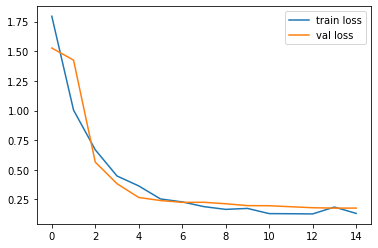

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

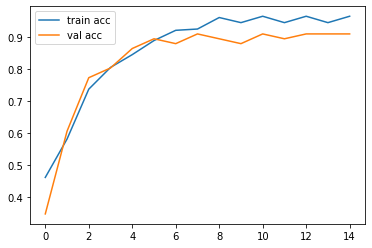

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
y_pred=model.predict(test_set)
y_pred

array([[2.48605106e-02, 1.51880756e-01, 8.23258758e-01],
       [5.77919172e-06, 9.01144564e-01, 9.88496616e-02],
       [9.88380671e-01, 1.14765295e-04, 1.15045514e-02],
       [2.86680624e-05, 9.26935732e-01, 7.30356723e-02],
       [4.11506880e-05, 8.42480004e-01, 1.57478824e-01],
       [4.14041948e-04, 1.25321047e-03, 9.98332798e-01],
       [9.82591093e-01, 7.20391842e-03, 1.02049420e-02],
       [1.86261942e-03, 3.33399996e-02, 9.64797318e-01],
       [3.58087927e-05, 3.24339479e-01, 6.75624728e-01],
       [1.15936527e-04, 1.84841946e-01, 8.15042078e-01],
       [4.47395614e-05, 8.06318879e-01, 1.93636388e-01],
       [9.99039471e-01, 2.46251759e-04, 7.14241120e-04],
       [8.37766588e-01, 8.16158671e-03, 1.54071867e-01],
       [3.17637511e-02, 2.07657106e-02, 9.47470605e-01],
       [6.79342411e-05, 6.65268242e-01, 3.34663808e-01],
       [9.31114495e-01, 1.08675077e-03, 6.77986890e-02],
       [6.42788873e-05, 9.92851675e-01, 7.08402181e-03],
       [9.98825490e-01, 2.51419